In [1]:
%load_ext autoreload
%autoreload 2
import torch, rdkit
import sys, pathlib
from pathlib import Path
PROJECT_ROOT = Path.home()/"바탕화면"/"torch"/"Chem"
sys.path.insert(0, str(PROJECT_ROOT))
from rdkit import Chem
from utils.utils import *

from pathlib import Path
device   = "cuda"

vocab = {'(': 0, ')': 1, '=': 2, '[O;!R;C]': 3, '[CH3;!R;C]': 4, '[CH2;!R;CN]': 5, '[CH2;!R;CC]': 6, '[CH2;!R;CO]': 7, '[*;!R;C]': 8, '[SOS]': 9, '[EOS]': 10, '[O;!R;CC]': 11, '[NH;!R;CC]': 12, '[*;!R;O]': 13, '[O;!R;*C]': 14, '[C;!R;*OO]': 15, '[CH;!R;CCO]': 16, '[CH;!R;CCN]': 17, '[C;!R;CNO]': 18, '[N;!R;CCC]': 19, '[C;!R;*NO]': 20, '[NH;!R;*C]': 21, '[*;!R;N]': 22, '[CH3;!R;N]': 23, '[CH;!R;CCC]': 24, '[C;!R;CCCO]': 25, '[CH;!R;CC]': 26, '[F;!R;C]': 27, '[CH2;!R;C]': 28, '[C;!R;COO]': 29, '[CH3;!R;O]': 30, '[C;!R;CCCN]': 31, '#': 32, '[C;!R;CCCC]': 33, '[CH2;!R;CS]': 34, '[C;!R;CC]': 35, '[OH;!R;C]': 36, '[S;!R;CC]': 37, '[N;!R;C]': 38, '[C;!R;CN]': 39, '[CH;!R;C]': 40, '[C;!R;CCC]': 41, '[NH2;!R;C]': 42, '[CH;!R;CFF]': 43, '[O;!R;S]': 44, '[O;!R;CN]': 45, '[CH;!R;CCS]': 46, '[CH2;!R;CF]': 47, '[CH3;!R;S]': 48, '[C;!R;CCO]': 49, '[NH;!R;CO]': 50, '[CH2;!R;*C]': 51, '[C;!R;NNO]': 52, '[C;!R;CFFF]': 53, '[C;!R;CCFF]': 54, '[C;!R;NOO]': 55, '[C;!R;OOO]': 56, '[S;!R;CCOO]': 57, '[CH3;!R;Si]': 58, '[C;!R;NNS]': 59, '[S;!R;C]': 60, '[NH;!R;C]': 61, '[Cl;!R;C]': 62, '[OH;!R;P]': 63, '1': 64, '[C;!R;CNN]': 65, '[CH;!R;CN]': 66, '[SH;!R;C]': 67, '[CH;!R;CCF]': 68, '[O;!R;P]': 69, '[CH2;!R;NO]': 70, '[O;R;CC]': 71, '[C;!R;CCCl]': 72, '[CH2;!R;CSi]': 73, '[CH;!R;NN]': 74, '[cH;R;CC]': 75, '[c;R;CCO]': 76, '[CH;!R;CO]': 77, '[Si;!R;CCCC]': 78, '[C;!R;CCN]': 79, '[N;!R;CN]': 80, '[NH;!R;CS]': 81, '[CH;!R;COO]': 82, '[N;!R;CCO]': 83, '[P;!R;COOO]': 84, '[C;!R;CCNN]': 85, '[N;!R;CO]': 86, '[CH;!R;CCl]': 87, '[S;!R;CNOO]': 88, '[C;!R;CCCF]': 89, '[CH2;!R;NSi]': 90, '[O;!R;CS]': 91, '[NH2;!R;O]': 92, '[NH;!R;CN]': 93, '[CH;R;CCO]': 94, '[CH2;R;CO]': 95, '[C;R;OOO]': 96, '[C;!R;CCF]': 97, '[C;!R;CCOO]': 98, '[N;!R;CCN]': 99, '[N;!R;CS]': 100, '[S;!R;CCNO]': 101, '[OH;!R;N]': 102, '[C;!R;NNN]': 103, '[S;!R;CCO]': 104, '[CH2;!R;CP]': 105, '[CH;!R;CNP]': 106, '[OH;!R;S]': 107, '[NH2;!R;N]': 108, '[N;!R;CC]': 109, '[Si;!R;*CCC]': 110, '[*;!R;Si]': 111, '[CH;!R;CS]': 112, '[C;!R;*CO]': 113, '[S;!R;COOO]': 114, '[O;!R;CP]': 115, '[S;!R;NNOO]': 116, '[NH2;!R;S]': 117, '[CH;R;*CN]': 118, '[N;R;CCC]': 119, '2': 120, '[CH2;!R;OO]': 121, '[C;!R;NN]': 122, 'N': 123, '[S;!R;COOS]': 124, '[S;!R;S]': 125, '[C;!R;CCCS]': 126, '[CH2;!R;NS]': 127, '[P;!R;OOOO]': 128, '[CH;!R;CNO]': 129, '[S;!R;OOO]': 130, '[O;!R;*S]': 131, '[CH2;!R;SS]': 132, '[CH;!R;FFO]': 133, '[CH2;!R;OP]': 134, '[C;!R;NSS]': 135, '[CH;!R;COP]': 136, '[C;!R;CFFO]': 137, '[CH;!R;CNS]': 138, '[c;R;CCC]': 139, '[CH;!R;CNN]': 140, '[C;!R;CSi]': 141, '[C;R;NNO]': 142, '[c;R;*CC]': 143, '[CH;!R;*CC]': 144, '[CH2;!R;NN]': 145, '[[N+]': 146, 'O': 147, '[[O-]': 148, '[N;!R;NO]': 149, '[CH;!R;NO]': 150, '[CH2;!R;OSi]': 151, '[CH;!R;NNN]': 152, '[P;!R;CCOO]': 153, '[C;!R;CClCl]': 154, '[C;!R;CCNO]': 155, '[C;!R;COS]': 156, '[N;!R;CCS]': 157, '[C;!R;CCCCl]': 158, '[C;!R;CCFO]': 159, '[C;!R;CCOP]': 160, '[SH;!R;O]': 161, '[S;!R;OOOO]': 162, '[C;!R;OSS]': 163, '[C;!R;CCClCl]': 164, '[PH;!R;CCO]': 165, '[PAD]': 166}
index_to_token = {idx: token for token, idx in vocab.items()}

cuda


In [2]:
def select_model(choice):
    if choice == "Trans_MHA":
        from models.Trans_MHA import CVAE, PriorNet
        model    = CVAE().cuda().eval()
        model.decoder.cuda().eval()
        prior = PriorNet(y_dim=3, latent_dim=64).cuda().eval()

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_dmodel256.pth")
        state_dict = torch.load(save_path)
        model.load_state_dict(state_dict)

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_prior.pth")
        state_dict = torch.load(save_path)
        prior.load_state_dict(state_dict)

    # Trans
    elif choice == "Trans":
        from models.Trans import CVAE, PriorNet
        model    = CVAE().cuda().eval()
        model.decoder.cuda().eval()
        prior = PriorNet(y_dim=3, latent_dim=64).cuda().eval()

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_dmodel256_no_mha.pth")
        state_dict = torch.load(save_path)
        model.load_state_dict(state_dict)

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_prior_no_mha.pth")
        state_dict = torch.load(save_path)
        prior.load_state_dict(state_dict)
    # LSTM
    elif choice == "LSTM":
        from models.LSTM import CVAE, PriorNet
        model    = CVAE().cuda().eval()
        model.decoder.cuda().eval()
        prior = PriorNet(y_dim=3, latent_dim=64).cuda().eval()

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_LSTM.pth")
        state_dict = torch.load(save_path)
        model.load_state_dict(state_dict)

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_LSTM_prior.pth")
        state_dict = torch.load(save_path)
        prior.load_state_dict(state_dict)


    # LSTM + MHA
    elif choice == "LSTM_MHA":
        from models.LSTM_MHA import CVAE, PriorNet
        model    = CVAE().cuda().eval()
        model.decoder.cuda().eval()
        prior = PriorNet(y_dim=3, latent_dim=64).cuda().eval()

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_LSTM_MHA.pth")
        state_dict = torch.load(save_path)
        model.load_state_dict(state_dict)

        save_path = (PROJECT_ROOT / "models/weights" / "model_weights_LSTM_MHA_prior.pth")
        state_dict = torch.load(save_path)
        prior.load_state_dict(state_dict)
    

    return model, prior

In [3]:
def select_kernel(choice, model, prior, condition):
    condition = condition.repeat(1024, 1, 1)
    # Trans + MHA
    if choice == "Trans_MHA":
        mean, var = prior(condition.squeeze())
        z = model.reparameterize(mean, var)
        condition = model.input_embedding_p(condition)
        condition = model.pos_enc(condition)
        z_prime = model.ff(model.crossattn(z.view(-1, 42, 64), condition, condition))

    # Trans
    elif choice == "Trans":
        mean, var = prior(condition.squeeze())
        z_prime = model.reparameterize(mean, var)
        z_prime = z_prime.view(-1, 42 ,64)


    # LSTM
    elif choice == "LSTM":
        mu, lv = prior(condition.squeeze())
        z = model.reparameterize(mu, lv)
        z_prime = z

    # LSTM + MHA
    elif choice == "LSTM_MHA":
        mean, var = prior(condition.squeeze())
        z = model.reparameterize(mean, var)
        condition = model.input_embedding_p(condition)
        z_prime = model.ff(model.crossattn(z, condition, condition))
    
    return z_prime, condition

In [4]:
latent_dim = 64
#condition = torch.tensor([21.0, -0.4, 1.4]).unsqueeze(-1).to(device) 
condition = torch.tensor([0, -0.4, 1.4]).unsqueeze(-1).to(device)
mode = "Trans_MHA"
model, prior = select_model(mode)
z_prime, props = select_kernel(mode, model, prior, condition)

# 예시 호출 (z_prime는 shape [1, 265, 64]라고 가정)벡터
if mode =="Trans" or mode =="Trans_MHA":
    generated_tokens = generate_batch_sequence(model, z_prime,
                                        max_length=42, start_token=9, end_token=10, pad_token=166, fixed_seq_len=42,
                                        device=device)
elif mode=="LSTM": # LSTM
    generated_tokens = generate_batch_sequence_LSTM(model, z_prime, start_token=9, end_token=10, pad_token=166,
                                                    device=device, grammar_mask_fn=build_grammar_mask,
                                                    index_to_token=index_to_token)
else:
    generated_tokens = generate_batch_sequence_LSTM_MHA(model, z=z_prime, start_token=9, end_token=10, pad_token=166,
                                                        grammar_mask_fn=build_grammar_mask, index_to_token=index_to_token)
print("Generated token sequence:", generated_tokens)

Generated token sequence: [[9, 22, 21, 17, 0, 4, 1, 24, 0, 5, 12, 18, 0, 2, 3, 1, 16, 0, 6, 39, 32, 38, 1, 11, 15, 0, 8, 1, 2, 3, 10], [9, 22, 21, 5, 24, 0, 4, 1, 6, 18, 0, 2, 3, 1, 12, 17, 0, 4, 1, 7, 11, 15, 0, 8, 1, 2, 3, 10], [9, 22, 21, 5, 31, 0, 4, 1, 0, 6, 18, 0, 2, 3, 1, 12, 20, 0, 8, 1, 2, 3, 1, 29, 0, 2, 3, 10], [9, 22, 21, 5, 24, 0, 4, 1, 18, 0, 2, 3, 1, 12, 17, 0, 39, 32, 38, 1, 11, 15, 0, 8, 1, 2, 3, 10], [9, 22, 21, 5, 24, 0, 4, 1, 18, 0, 2, 3, 1, 12, 17, 0, 26, 2, 28, 1, 7, 11, 15, 0, 8, 1, 2, 3, 10], [9, 22, 21, 17, 0, 4, 1, 18, 0, 2, 3, 1, 12, 5, 49, 0, 2, 3, 1, 6, 4, 10], [9, 22, 21, 5, 24, 0, 4, 1, 18, 0, 2, 3, 1, 12, 17, 0, 39, 32, 38, 1, 7, 11, 15, 0, 8, 1, 2, 3, 10], [9, 22, 21, 5, 24, 0, 4, 1, 18, 0, 2, 3, 1, 12, 31, 0, 35, 32, 40, 1, 0, 4, 1, 12, 20, 0, 8, 1, 2, 3, 10], [9, 22, 21, 17, 0, 6, 43, 0, 27, 1, 27, 1, 5, 12, 18, 0, 2, 3, 1, 16, 0, 4, 1, 11, 15, 0, 8, 1, 2, 3, 10], [9, 22, 21, 17, 0, 6, 4, 1, 18, 0, 2, 3, 1, 12, 20, 0, 8, 1, 2, 3, 10], [9, 22, 21, 5, 1

In [5]:
from rdkit import Chem, RDLogger
from rdkit.Chem import DataStructs, rdFingerprintGenerator
RDLogger.DisableLog('rdApp.error')

generated_smiles = []

canbe = 0
notbe = 0
for i in range(len(generated_tokens)):
    try:
        smiles = reverse_one_hot_encoding(torch.tensor(generated_tokens[i]), vocab)
        del smiles[0]
        del smiles[-1]
        smiles = atomInSmiles.decode(' '.join(smiles))
        
        PS(smiles)
        print(PS(smiles).psmiles)
        canbe += 1
        generated_smiles.append(smiles)
    except:
        notbe += 1


print("가능한 분자 개수 :", canbe)
print("불가능한 분자 개수 :", notbe)


[*]NCC(C)CC(=O)NC(COC([*])=O)C(=O)
[*]NCC(CC(C)C(=O)NC([*])=O)
[*]NCC(C)C(=O)NC(C)(COC([*])=O)C(=O)
[*]NCC(F)C(NC([*])=O)C(=O)
[*]NCC(C(C)CC(=O)NC([*])=O)C(F)
[*]NCC(C)(CC(=O)NC([*])=O)C(F)
[*]NCC(CF)C(NC([*])=O)C(=O)
[*]NC(C)CC(=O)NC(C)(CC(C)OC([*])=O)
[*]NCC(CC)(OC([*])=O)C(F)
[*]NCC(CC)(C)NC(=O)C(OC([*])=O)C(F)
[*]NCC(C)(C=C)C(NC([*])=O)C(=O)
[*]NCC(C)(CC(=O)NC([*])=O)C(F)
[*]NC(C)C(CC(=O)NC([*])=O)C(=O)
[*]NCC(C)(CC(=O)NC(C)NC([*])=O)C(=O)
[*]NCC(F)C(NC([*])=O)C(=O)
[*]NC(C)C(CC(=O)NC([*])=O)C(F)
[*]NCC(OC([*])=O)C(=O)NC(C)C(F)
[*]NCC(CC(=O)C(C=C)NC([*])=O)C(C)
[*]NCC(C(C)C(=O)NC(C=C)OC([*])=O)C(C)
[*]NCC(C)(CC(=O)NC([*])=O)C(F)(F)
[*]NC(CC(=O)N(C)C(C)CNC([*])=O)C(=O)
[*]NCC(F)C(CCNC([*])=O)C(F)
[*]NCC(CC)(CC(=O)NC([*])=O)C(=O)O
[*]NCC(C)(CC(=O)C(C)OC([*])=O)C(F)
[*]NC(CNC(=O)CC(C)OC([*])=O)C(F)
[*]NCC(CC)(NC([*])=O)C(=O)
[*]NCC(CCNC(=O)C(C=C)OC([*])=O)C(C)
[*]NCC(C)C(=O)NC(COC([*])=O)C(F)
[*]NCC(C)(CC#N)C(NC([*])=O)C(F)
[*]NCC(C)(NC(=O)C(C)OC([*])=O)C(=O)
[*]NCC(C)(C)C(CC(=O)NC([*

In [6]:
from fcd_torch import FCD
from pathlib import Path

original_smiles = pd.read_csv("/home/kiket/바탕화면/torch/Chem/data/simulation-trajectory-aggregate_aligned.csv").iloc[:,1].values
calc       = FCD(device=device, n_jobs=8)

fcd_score  = calc(generated_smiles, original_smiles)
print(f"FCD = {fcd_score:.3f}")


FCD = 10.046


(array([4.000e+00, 1.900e+01, 4.800e+01, 1.780e+02, 5.170e+02, 1.383e+03,
        2.802e+03, 1.263e+03, 5.400e+01, 2.000e+00]),
 array([-5.93675404, -4.97875974, -4.02076543, -3.06277113, -2.10477682,
        -1.14678252, -0.18878821,  0.76920609,  1.72720039,  2.6851947 ,
         3.643189  ]),
 <BarContainer object of 10 artists>)

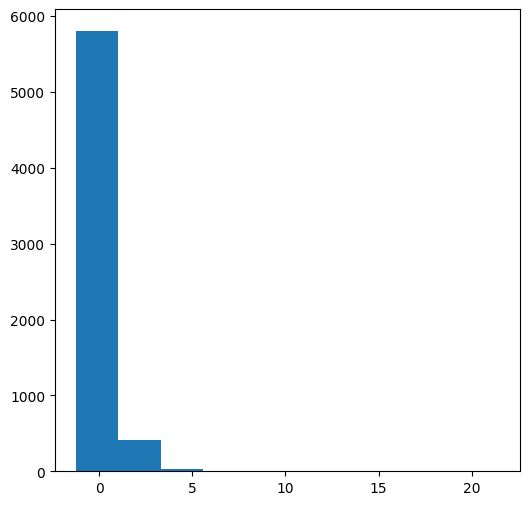

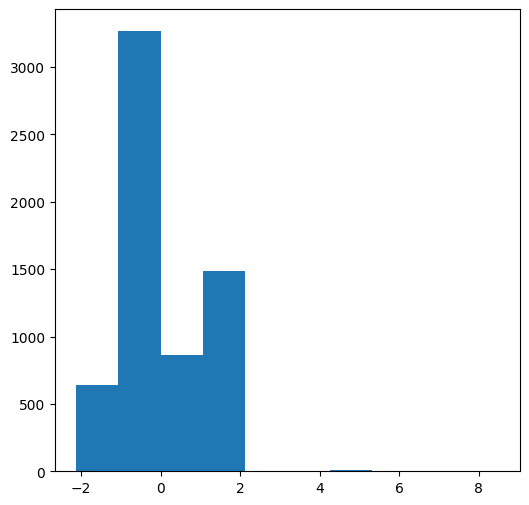

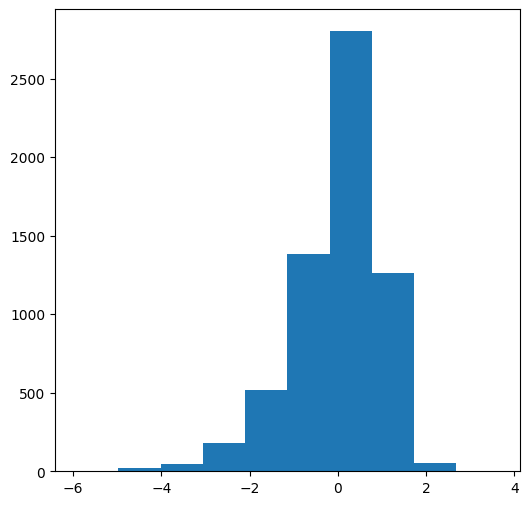

In [7]:
raw = pd.read_csv("/home/kiket/바탕화면/torch/Chem/data/simulation-trajectory-aggregate_aligned.csv")
#Li-ion Conductivity
conductivity = raw.iloc[:, 6:7].values
conductivity = mm_scaler.fit_transform(conductivity.reshape(-1, 1))
conductivity = log_minmax_pipeline.fit_transform(conductivity.reshape(-1, 1))

#Degree of Polymerization
DP = raw.iloc[:, 4:5].values
DP = mm_scaler.fit_transform(DP.reshape(-1, 1))

#Transfer Number
tn = raw.iloc[:, 10:11].values
tn = mm_scaler.fit_transform(tn.reshape(-1, 1))

properties = np.concat((conductivity, DP, tn), axis=-1)
mean_vec = properties.mean(axis=0)
std_vec  = properties.std(axis=0)
properties = (properties - mean_vec) / std_vec  # 정규화된 3차원 조건 벡터

plt.figure(figsize=(6,6))
plt.hist(properties[:,0])
plt.figure(figsize=(6,6))
plt.hist(properties[:,1])
plt.figure(figsize=(6,6))
plt.hist(properties[:,2])